<a href="https://colab.research.google.com/github/ChojnackiKRZ/01_evaluation_KNN/blob/main/01_evaluation_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STANDARIZATION AND IT'S EFFECTS**

In [13]:
from sklearn.datasets import load_wine
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import joblib
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from os import chdir

In [2]:
wine = load_wine()

X, y = wine.data, wine.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##WITHOUT StandardScaler

In [11]:
dummy = DummyClassifier(strategy='prior')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.4666666666666667

In [17]:
file = 'dummy_model.sav'
joblib.dump(dummy, filename = file)

['dummy_model.sav']

In [18]:
loaded_dummy_model = joblib.load(filename = file)

In [35]:
#KNN only should be given odd number of neighbors

train_KNN_list = []
test_KNN_list = []
x_values = []

for n in range(1, 11):
    if n % 2 != 0:
      knn = KNeighborsClassifier(n_neighbors=n)
      knn.fit(X_train, y_train)
      train_KNN_list.append(knn.score(X_train, y_train))
      test_KNN_list.append(knn.score(X_test, y_test))
      x_values.append(n)
  
print(x_values)
print(train_KNN_list)
print(test_KNN_list)


[1, 3, 5, 7, 9]
[1.0, 0.8872180451127819, 0.7894736842105263, 0.7819548872180451, 0.7518796992481203]
[0.7555555555555555, 0.7333333333333333, 0.7333333333333333, 0.7777777777777778, 0.7111111111111111]


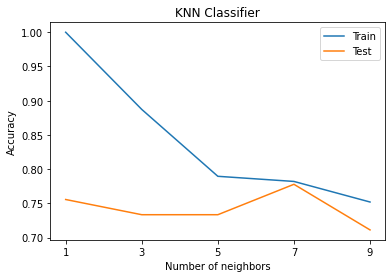

In [43]:
xi = list(range(len(x_values)))
plt.plot(xi, train_KNN_list, label = 'Train')
plt.plot(xi, test_KNN_list, label = 'Test')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Classifier")
plt.xticks(xi, x_values)
plt.legend()
plt.show()

##WITH StandardScaler

In [44]:
standarizer = StandardScaler()

X_train_std = standarizer.fit_transform(X_train)
X_test_std = standarizer.fit_transform(X_test)

In [46]:
train_KNN_std_list = []
test_KNN_std_list = []

for n in range(1, 11):
  if n % 2 != 0:
    knn = KNeighborsClassifier(n_neighbors=n+1)
    knn.fit(X_train_std, y_train)
    train_KNN_std_list.append(knn.score(X_train_std, y_train))
    test_KNN_std_list.append(knn.score(X_test_std, y_test))

As we can clearly see below, standarization improved our model.

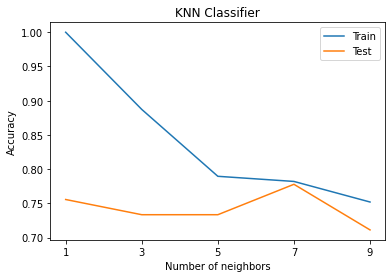

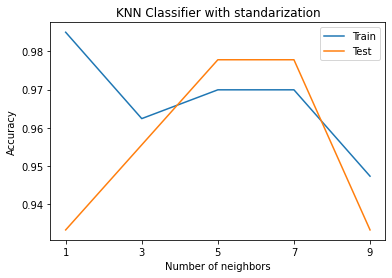

In [49]:
xi = list(range(len(x_values)))
plt.plot(xi, train_KNN_list, label = 'Train')
plt.plot(xi, test_KNN_list, label = 'Test')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Classifier")
plt.xticks(xi, x_values)
plt.legend()
plt.show()

xi = list(range(len(x_values)))
plt.plot(xi, train_KNN_std_list, label = 'Train')
plt.plot(xi, test_KNN_std_list, label = 'Test')
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Classifier with standarization")
plt.xticks(xi, x_values)
plt.legend()
plt.show()